In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/heart-attack-prediction-dataset")

print("Path to dataset files:", path)

/home/blueberry/Picsart-Academy/.venv/lib64/python3.14/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/blueberry/.cache/kagglehub/datasets/iamsouravbanerjee/heart-attack-prediction-dataset/versions/2


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
!ls /home/blueberry/.cache/kagglehub/datasets/iamsouravbanerjee/heart-attack-prediction-dataset/versions/2

heart_attack_prediction_dataset.csv


In [5]:
df = pd.read_csv("/home/blueberry/.cache/kagglehub/datasets/iamsouravbanerjee/heart-attack-prediction-dataset/versions/2/heart_attack_prediction_dataset.csv")

In [6]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [7]:
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [8]:
# Dataset shape and info
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

# Basic statistics
print("\nBasic Statistics:")
print(df.describe())



Dataset Shape: (8763, 26)

Dataset Info:
<class 'pandas.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   str    
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   str    
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   str    
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   flo

In [9]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64


In [10]:
# Data types
print("\nData Types:")
print(df.dtypes)


Data Types:
Patient ID                             str
Age                                  int64
Sex                                    str
Cholesterol                          int64
Blood Pressure                         str
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                   str
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                                st

<Axes: >

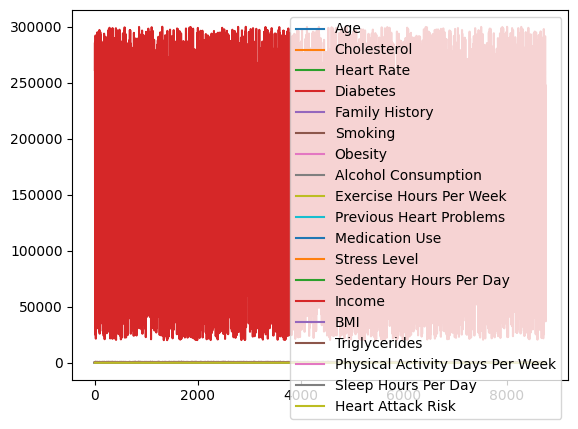

In [12]:
df.plot()

In [15]:
by_age = df.groupby(df.Age)
print("\nHeart Attack Risk by Age:")
print(by_age['Heart Attack Risk'].value_counts())


Heart Attack Risk by Age:
Age  Heart Attack Risk
18   0                    82
     1                    41
19   0                    88
     1                    40
20   0                    91
                          ..
88   1                    41
89   0                    74
     1                    43
90   0                    97
     1                    55
Name: count, Length: 146, dtype: int64


<Axes: xlabel='Age', ylabel='Density'>

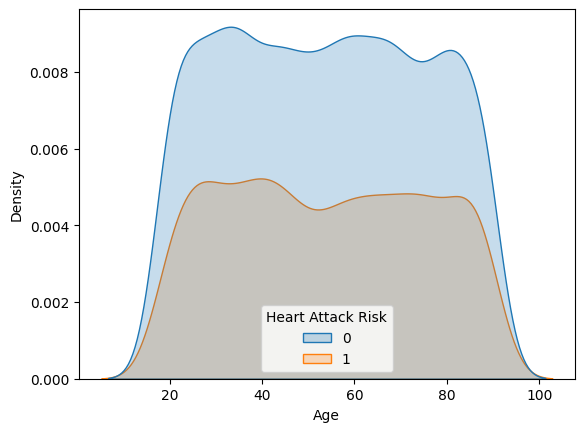

In [18]:
sns.kdeplot(data=df, x='Age', hue='Heart Attack Risk', fill=True)

<Axes: xlabel='BMI', ylabel='Density'>

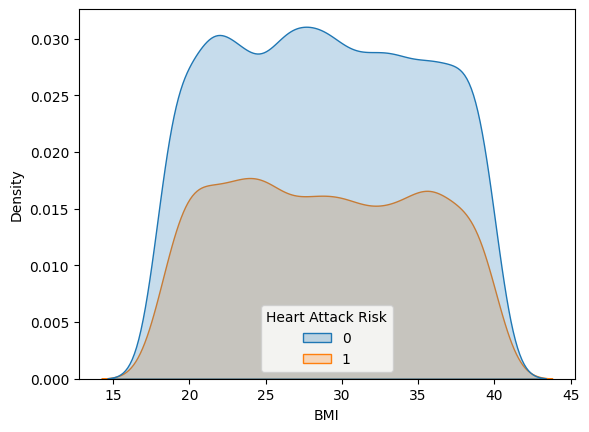

In [19]:
sns.kdeplot(data=df, x='BMI', hue='Heart Attack Risk', fill=True)

/tmp/ipykernel_8619/3357476294.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Heart Attack Risk', data=df, palette='viridis')


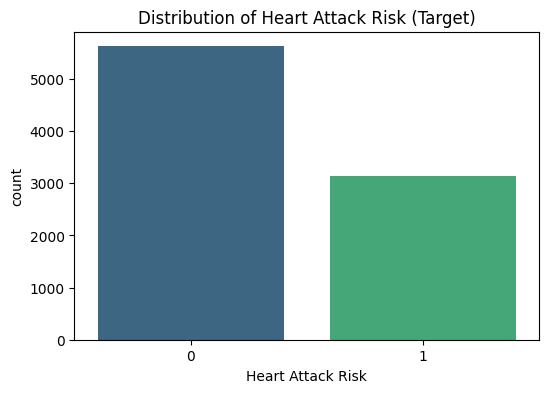

In [36]:
# 2. Visualizing Target Variable Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Heart Attack Risk', data=df, palette='viridis')
plt.title('Distribution of Heart Attack Risk (Target)')
plt.show()



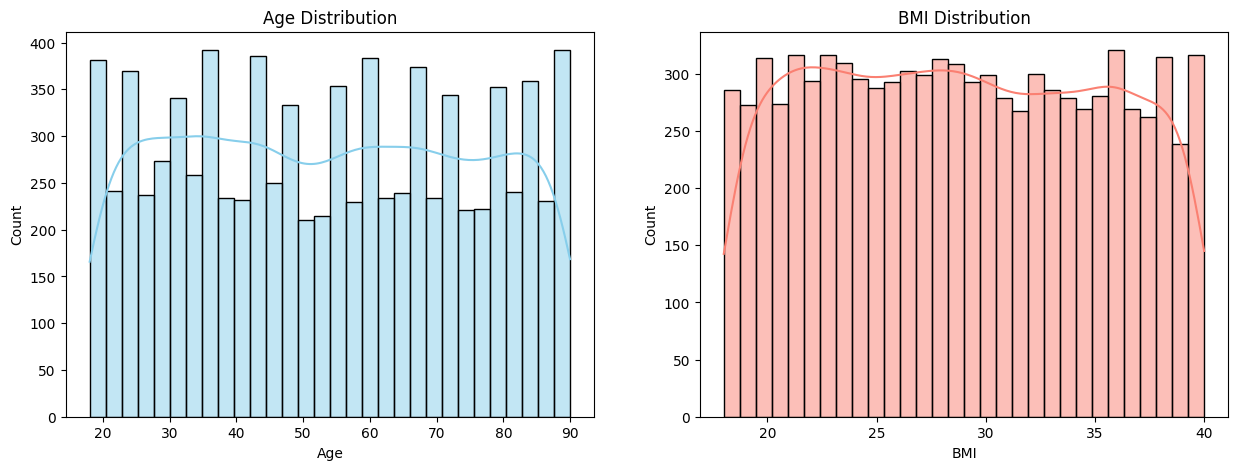

In [39]:
# 3. Age and BMI Distributions
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df['Age'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Age Distribution')

sns.histplot(df['BMI'], bins=30, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('BMI Distribution')
plt.show()

In [38]:
df['BMI'].value_counts()

BMI
31.251233    1
27.194973    1
28.176571    1
36.464704    1
21.809144    1
            ..
19.655895    1
23.993866    1
35.406146    1
27.294020    1
32.914151    1
Name: count, Length: 8763, dtype: int64

<Axes: xlabel='BMI', ylabel='Cholesterol'>

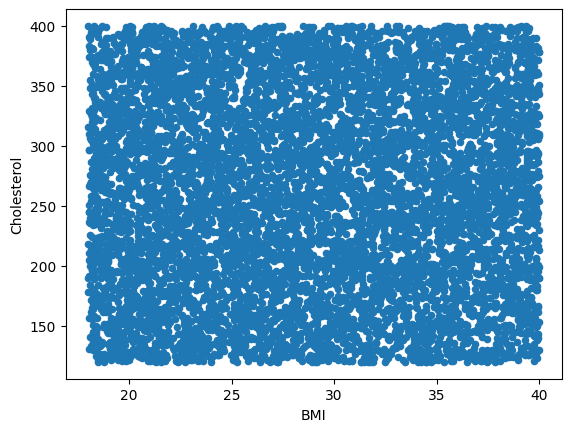

In [26]:
df.plot(kind='scatter', x='BMI', y='Cholesterol')

<Axes: xlabel='BMI', ylabel='Cholesterol'>

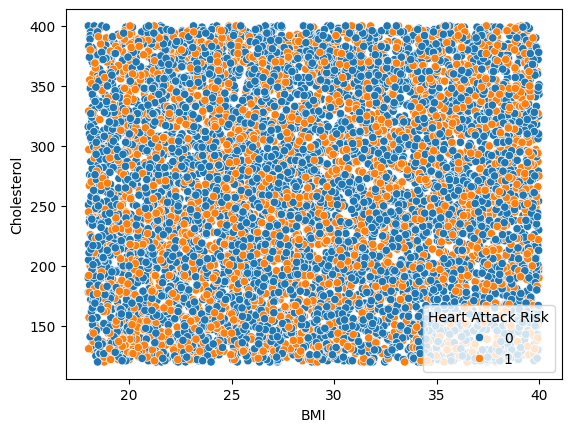

In [27]:
sns.scatterplot(data=df, x='BMI', y='Cholesterol', hue='Heart Attack Risk')

<Axes: xlabel='Heart Attack Risk', ylabel='BMI'>

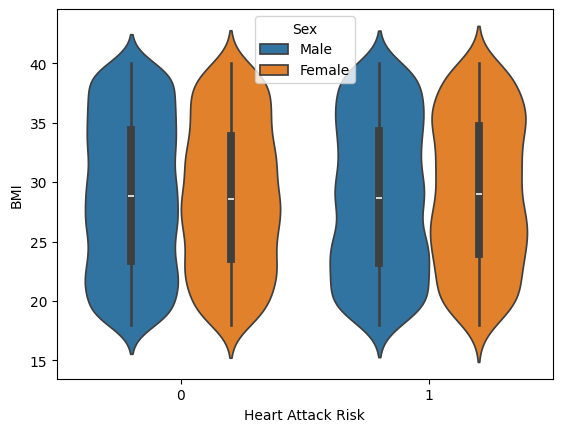

In [34]:
sns.violinplot(data=df, x='Heart Attack Risk', y='BMI', hue='Sex')

In [ ]:
# Categorical columns analysis
print("\nCategorical Columns Distribution:")
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())



Categorical Columns Distribution:

Patient ID:
Patient ID
BMW7812    1
CZE1114    1
BNI9906    1
JLN3497    1
GFO8847    1
          ..
MSV9918    1
QSV6764    1
XKA5925    1
EPE6801    1
ZWN9666    1
Name: count, Length: 8763, dtype: int64

Sex:
Sex
Male      6111
Female    2652
Name: count, dtype: int64

Blood Pressure:
Blood Pressure
146/94    8
101/93    8
140/95    7
106/64    7
94/109    7
         ..
174/63    1
102/92    1
137/94    1
94/76     1
119/67    1
Name: count, Length: 3915, dtype: int64

Diet:
Diet
Healthy      2960
Average      2912
Unhealthy    2891
Name: count, dtype: int64

Country:
Country
Germany           477
Argentina         471
Brazil            462
United Kingdom    457
Australia         449
Nigeria           448
France            446
Canada            440
China             436
New Zealand       435
Japan             433
Italy             431
Spain             430
Colombia          429
Thailand          428
South Africa      425
Vietnam           425
Unit

/tmp/ipykernel_127682/1457540037.py:3: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = df.select_dtypes(include=['object']).columns


Text(0.5, 1.0, 'Correlation Heatmap of Numeric Features')

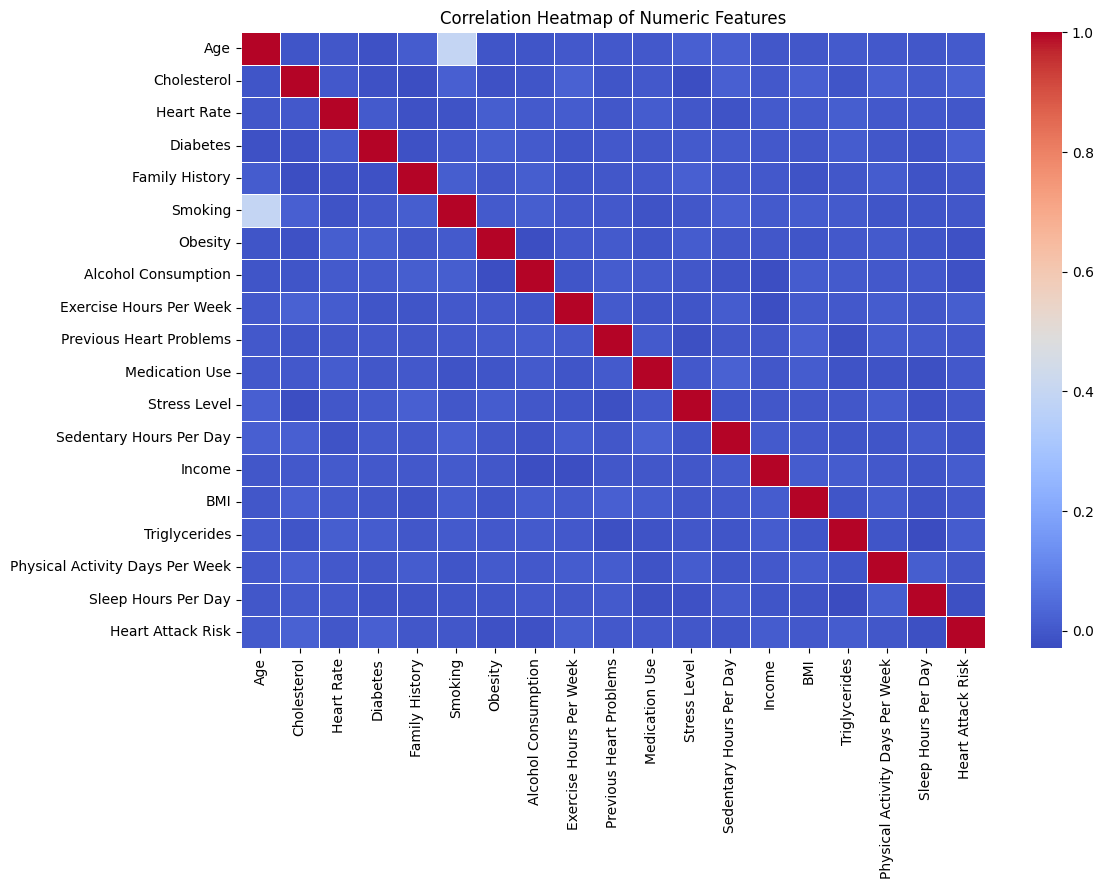

In [41]:
# 4. Correlation Analysis
# Selecting only numeric columns for heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')


In [ ]:
# Correlation analysis
print("\nCorrelation Matrix:")
numeric_df = df.select_dtypes(include=[np.number])
print(numeric_df.corr())



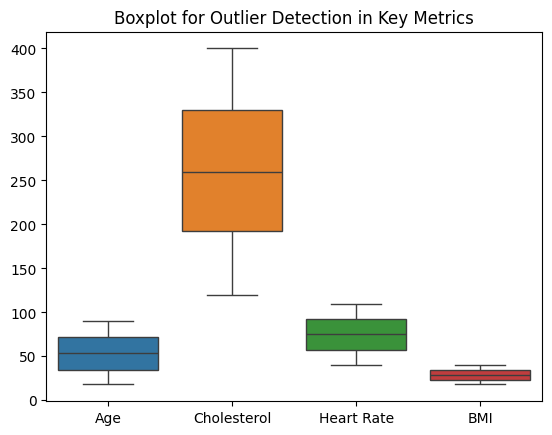

In [44]:
sns.boxplot(data=df[['Age', 'Cholesterol', 'Heart Rate', 'BMI']])
plt.title('Boxplot for Outlier Detection in Key Metrics')
plt.show()

In [ ]:
# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Heart Attack Risk distribution
df['Heart Attack Risk'].value_counts().plot(kind='bar', ax=axes[0, 0], color=['green', 'red'])
axes[0, 0].set_title('Heart Attack Risk Distribution')
axes[0, 0].set_ylabel('Count')

# Age distribution
axes[0, 1].hist(df['Age'], bins=30, color='skyblue', edgecolor='black')
axes[0, 1].set_title('Age Distribution')
axes[0, 1].set_xlabel('Age')

# BMI distribution
axes[1, 0].hist(df['BMI'], bins=30, color='salmon', edgecolor='black')
axes[1, 0].set_title('BMI Distribution')
axes[1, 0].set_xlabel('BMI')

# Heart Attack Risk by Sex
df.groupby(['Sex', 'Heart Attack Risk']).size().unstack().plot(kind='bar', ax=axes[1, 1], color=['green', 'red'])
axes[1, 1].set_title('Heart Attack Risk by Sex')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()